We're going to take a break from our tour of data structures in order to look at the concept of recursion. Recursion is going to be a useful tool for solving some of the problems we'll be tackling later on, and this is a good place to introduce it and get some practice using it with the data structures we're reviewing.

When you hear the terms recursion or recursive, this might remind you of the terms repetition and repetitive—and this is a good connection, because recursion does indeed involve repetition. However, recursion isn't just about repetition.

With recursion, we solve a problem by first solving smaller instances of the same problem. In practice, this often involves calling a function from within itself—in other words, we feed some input into the function, and the function produces some output—which we then feed back into the same function. And we continue to do this until we arrive at the solution.

## Introduction

Recursion is a technique for solving problems where the solution to a particular problem depends on the solution to a smaller instance of the same problem. 

Consider the problem of calculating $\mathtt{2^5}$. Let's assume to calculate this, you need to do one multiplication after another. That's $2 * 2 * 2 * 2 * 2$. We know that $2^5 = 2 * 2^4$. If we know the value of $2^4$, we can easily calculate $2^5$.

We can use recursion to solve this problem, since the solution to the original problem ($2^n$) depends on the solution to a smaller instance ($2^{n-1}$) of the same problem. The recursive solution is to calculate $2 * 2^{n-1}$ for all n that is greater than 0. If n is 0, return 1. We'll ignore all negative numbers.

Let's look at what the recursive steps would be for calculating $2^5$.

$2^5 = 2 * 2^4$

$2^5 = 2 * 2 * 2^3$

$2^5 = 2 * 2 * 2 * 2^2$

$2^5 = 2 * 2 * 2 * 2 * 2^1$

$2^5 = 2 * 2 * 2 * 2 * 2 * 2^0$

$2^5 = 2 * 2 * 2 * 2 * 2 * 1$

## Code
Let's look at the recursive function `power_of_2`, which calculates $2^n$.

In [ ]:
# Your code here
def power_of_2(n):
    pass

print(power_of_2(5))

As you can see, the function calls itself to calculate the smaller instance of the solution. Let's break down the `power_of_2` function, starting with the first two lines.
```
if n == 0:
    return 1
```
These lines contain the base case. This is where you catch edge cases that don't fit the problem ($2 * 2^{n-1}$). Since we aren't considering any $n < 0$ valid, $2 * 2^{n-1}$ can't be used when $n$ is $0$. This section of the code returns the solution to $2^0$ without using $2 * 2^{n-1}$.
```
return 2 * power_of_2(n - 1)
```
This code is where it breaks the problem down into smaller instances. Using the formula $2^{n} = 2 * 2^{n-1}$, the `power_of_2` function calls itself to calculate $2^{n-1}$. To better understand what is happening, let's look at the call stack with an example.

## Call Stack
Let's follow the [call stack](https://en.wikipedia.org/wiki/Call_stack) when calling `power_of_2(5)`:

First `power_of_2(5)` is called.

Then `power_of_2(5)` calls `power_of_2(4)`

Then `power_of_2(4)` calls `power_of_2(3)`

...

Then `power_of_2(1)` calls `power_of_2(0)`

At this point, the call stack will look something like this:
```
  ...
  File "<ipython-input-27-9e8459c7465f>", line 5, in power_of_2
    return 2 * power_of_2(n - 1)
  File "<ipython-input-27-9e8459c7465f>", line 5, in power_of_2
    return 2 * power_of_2(n - 1)
  File "<ipython-input-27-9e8459c7465f>", line 5, in power_of_2
    return 2 * power_of_2(n - 1)
  File "<ipython-input-27-9e8459c7465f>", line 5, in power_of_2
    return 2 * power_of_2(n - 1)
  File "<ipython-input-27-9e8459c7465f>", line 3, in power_of_2
    return 1
```
Let's look at a cleaner view of the stack:
```
...
    -> power_of_2(5)
        -> power_of_2(4)
            -> power_of_2(3)
                -> power_of_2(2)
                    -> power_of_2(1)
                        -> power_of_2(0)
```
Each function is waiting on the function it called to complete. So, `power_of_2(5)` is waiting for `power_of_2(4)`, `power_of_2(4)` is waiting for `power_of_2(3)`, etc..

The function `power_of_2(0)` will return $1$

Using the 1 returned from `power_of_2(0)`, `power_of_2(1)` will return $2 * 1$

Using the 2 returned from `power_of_2(1)`, `power_of_2(2)` will return $2 * 2$

...


Using the 16 returned from `power_of_2(4)`, `power_of_2(5)` will return $2 * 16$

Finally, the result of $2^5$ is returned! $2^5 = 2 * 2^4 = 2 * 16 = 32$

### Practice Problem
Implement `sum_integers(n)` to  calculate the sum of all integers from $1$ to $n$ using recursion. For example, `sum_integers(3)` should return $6$ ($1 + 2 + 3$).

In [ ]:
# Your code here 
def sum_integers(n):
    pass
        
sum_integers(3)

## Gotchas
When using recursion, there are a few things to look out for that you don't have to worry about when running a loop (iteratively). Let's go over a few of those items.

### Call Stack
We went over an example of the call stack when calling `power_of_2(5)` above. In this section, we'll cover the limitations of recursion on a call stack. Run the cell below to create a really large stack. It should raise the error `RecursionError: maximum recursion depth exceeded in comparison`.

In [3]:
print(power_of_2(10000))

RecursionError: maximum recursion depth exceeded in comparison

Python has a limit on the depth of recursion to prevent a [stack overflow](https://en.wikipedia.org/wiki/Stack_overflow). However, some compilers will turn [tail-recursive functions](https://en.wikipedia.org/wiki/Recursion_(computer_science)#Tail-recursive_functions) into an iterative loop to prevent recursion from using up the stack. Since Python's compiler doesn't do this, you'll have to watch out for this limit.
### Slicing
Let's look at recursion on arrays and how you can run into the problem of slicing the array. If you haven't heard the term slicing, it's the operation of taking a subset of some data. For example, the list `a` can be sliced using the following operation: `a[start:stop]`. This will return a new list from index `start` (inclusive) to index `stop` (exclusive).

Let's look at an example of a recursive function that takes the sum of all numbers in an array. For example, the array of `[5, 2, 9, 11]` would sum to 27 (5 + 2 + 9 + 11).

In [ ]:
# Your code here 


Looking at this, you might think it has a running time of O($n$), but that isn't correct due to the slice operation `array[1:]`. This operation will take O($k$) time to run where $k$ is the number of elements to copy. So, this function is actually O($k*n$) running time complexity and O($k*n$) space complexity.

To visualize this, let's plot the time it takes to slice.

[]

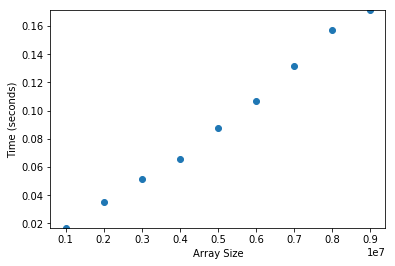

In [5]:
import matplotlib.pyplot as plt
import statistics
import time
%matplotlib inline

n_steps = 10
step_size = 1000000
array_sizes = list(range(step_size, n_steps*step_size, step_size))
big_array = list(range(n_steps*step_size))
times = []

# Calculate the time it takes for the slice function to run with different sizes of k
for array_size in array_sizes:
    start_time = time.time()
    big_array[:array_size]
    times.append(time.time() - start_time)

# Graph the results
plt.scatter(x=array_sizes, y=times)
plt.ylim(top=max(times), bottom=min(times))
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.plot()

As you can see, it's linear time to slice.

Instead of slicing, we can pass the index for the element that we want to use for addition. That will give us the following function:

In [6]:
# Your code here 
def sum_array_index(array, index):
    pass

arr = [1, 2, 3, 4]
print(sum_array_index(arr, 0))

10


That eliminates the need to do slicing. With the two different functions implemented, let's compare the running times.

[]

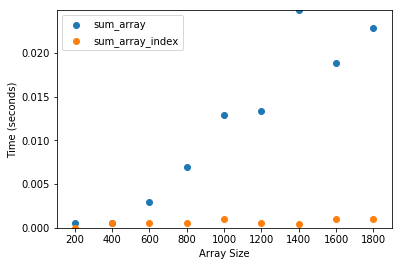

In [7]:
import matplotlib.pyplot as plt
import statistics
import time

n_steps = 10
step_size = 200
array_sizes = list(range(step_size, n_steps*step_size, step_size))
big_array = list(range(n_steps*step_size))
sum_array_times = []
sum_array_index_times = []

for array_size in array_sizes:
    subset_array = big_array[:array_size]
    
    start_time = time.time()
    sum_array(subset_array)
    sum_array_times.append(time.time() - start_time)
    
    start_time = time.time()
    sum_array_index(subset_array, 0)
    sum_array_index_times.append(time.time() - start_time)
    
    
plt.scatter(x=array_sizes, y=sum_array_times, label='sum_array')
plt.scatter(x=array_sizes, y=sum_array_index_times, label='sum_array_index')
plt.ylim(
    top=max(sum_array_times + sum_array_index_times),
    bottom=min(sum_array_times + sum_array_index_times))
plt.legend()
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.plot()

As you can see, the function `sum_array` is a polynomial and `sum_array_index` is linear as we predicted.

However, in our pursuit to use recursion we actually made things worse. Let's look at an iterative solution to this problem:

In [8]:
# Your code here
def sum_array_iter(array):
    pass

arr = [1, 2, 3, 4]
print(sum_array_iter(arr))

10


The `sum_array_iter` function is a lot more straightforward than the two recursive functions, which is important. Second, to help ensure an answer that is correct and bug free, you generally want to pick the solution that is more readable. In some cases recursion is more readable and in some cases iteration is more readable. As you gain experience reading other people’s code, you’ll get an intuition for code readability.

# Factorial using recursion

The **factorial** function is a mathematical function that multiplies a given number, $n$, and all of the whole numbers from $n$ down to 1.

For example, if $n$ is $4$ then we will get:

$4*3*2*1 = 24$

This is often notated using an exclamation point, as in $4!$ (which would be read as "four factorial").

So $4! = 4*3*2*1 = 24$

More generally, we can say that for any input $n$:

$n! = n * (n-1) * (n-2) ... 1$

If you look at this more closely, you will find that the factorial of any number is the product of that number and the factorial of the next smallest number. In other words:

$n! = n*(n-1)!$

Notice that this is recursive, meaning that we can solve for the factorial of any given number by first solving for the factorial of the next smallest number, and the next smallest number, and the next smallest number, and so on, until we reach 1.

If you were to write a Python function called `factorial` to calculate the factorial of a number, then we could restate what we said above as follows:

`factorial(n) = n * factorial(n-1)`

So that is the goal of this exercise: To use recursion to write a function that will take a number and return the factorial of that number.

For example, you should be able to call your function with `factorial(4)` and get back `24`.

**Note:** By definition, $0! = 1$

In [ ]:
# Code

def factorial(n):
    """
    Calculate n!
    
    Args:
       n(int): factorial to be computed
    Returns:
       n!
    """
    
    # TODO: Write your recursive factorial function here
    
    pass

In [12]:
# Test Cases

print ("Pass" if (1 == factorial(0)) else "Fail")
print ("Pass" if  (1 == factorial(1)) else "Fail")
print ("Pass" if  (120 == factorial(5)) else "Fail")

Pass
Pass
Pass


In [11]:
# Solution

def factorial(n):
    """
    Calculate n!

    Args:
       n(int): factorial to be computed
    Returns:
       n!
    """

    if n == 0:
        return 1  # by definition of 0!
    return n * factorial(n-1)

print ("Pass" if (1 == factorial(0)) else "Fail")
print ("Pass" if  (1 == factorial(1)) else "Fail")
print ("Pass" if  (120 == factorial(5)) else "Fail")

Pass
Pass
Pass


# Reversing a String

The goal in this notebook will be to get practice with a problem that is frequently solved by recursion: Reversing a string.

Note that Python has a built-in function that you could use for this, but the goal here is to avoid that and understand how it can be done using recursion instead.

In [ ]:
# Code

def reverse_string(input):
    """
    Return reversed input string
    
    Examples:
       reverse_string("abc") returns "cba"
    
    Args:
      input(str): string to be reversed
    
    Returns:
      a string that is the reverse of input
    """
    
    # TODO: Write your recursive string reverser solution here
    
    pass

In [ ]:
# Test Cases
    
print ("Pass" if  ("" == reverse_string("")) else "Fail")
print ("Pass" if  ("cba" == reverse_string("abc")) else "Fail")

In [13]:
# Solution

def reverse_string(input):
    """
    Return reversed input string
    
    Examples:
       reverse_string("abc") returns "cba"
    
    Args:
      input(str): string to be reversed
    
    Returns:
      a string that us reversed of input
    """
    if len(input) == 0:
        return ""
    else:
        first_char = input[0]
        the_rest = slice(1, None)
        sub_string = input[the_rest]
        reversed_substring = reverse_string(sub_string)
        return reversed_substring + first_char

print ("Pass" if  ("" == reverse_string("")) else "Fail")
print ("Pass" if  ("cba" == reverse_string("abc")) else "Fail")


Pass
Pass


# Return Codes

In an encryption system where ASCII lower case letters represent numbers in the pattern `a=1, b=2, c=3...` and so on, find out all the codes that are possible for a given input number. 

**Example 1**

* `number = 123`
* `codes_possible = ["aw", "abc", "lc"]`

Explanation: The codes are for the following number:
         
* 1 . 23     = "aw"
* 1 . 2 . 3  = "abc"
* 12 . 3     = "lc"
    

**Example 2**  

* `number = 145`
* `codes_possible = ["ade", "ne"]`

Return the codes in a list. The order of codes in the list is not important.

*Note: you can assume that the input number will not contain any 0s*

In [14]:
def all_codes(number):
    """
    :param: number - input integer
    Return - list() of all codes possible for this number
    TODO: complete this method and return a list with all possible codes for the input number
    """
    pass

In [18]:
def test_function(test_case):
    number = test_case[0]
    solution = test_case[1]
    
    output = all_codes(number)
    
    output.sort()
    solution.sort()
    
    if output == solution:
        print("Pass")
    else:
        print("Fail")

In [17]:
number = 123
solution = ['abc', 'aw', 'lc']
test_case = [number, solution]
test_function(test_case)

number = 145
solution =  ['ade', 'ne']
test_case = [number, solution]
test_function(test_case)

number = 1145
solution =  ['aade', 'ane', 'kde']
test_case = [number, solution]
test_function(test_case)

number = 4545
solution = ['dede']
test_case = [number, solution]
test_function(test_case)

Pass
Pass
Pass
Pass


In [16]:
# Solution

def get_alphabet(number):
    """
    Helper function to figure out alphabet of a particular number
    Remember: 
        * ASCII for lower case 'a' = 97
        * chr(num) returns ASCII character for a number e.g. chr(65) ==> 'A'
    """
    return chr(number + 96)

def all_codes(number):
    if number == 0:
        return [""]
    
    # calculation for two right-most digits e.g. if number = 1123, this calculation is meant for 23
    remainder = number % 100
    output_100 = list()
    if remainder <= 26 and number > 9 :
        
        # get all codes for the remaining number
        output_100 = all_codes(number // 100)
        alphabet = get_alphabet(remainder)
        
        for index, element in enumerate(output_100):
            output_100[index] = element + alphabet
    
    # calculation for right-most digit e.g. if number = 1123, this calculation is meant for 3
    remainder = number % 10
    
    # get all codes for the remaining number
    output_10 = all_codes(number // 10)
    alphabet = get_alphabet(remainder)
    
    for index, element in enumerate(output_10):
        output_10[index] = element + alphabet
        
    output = list()
    output.extend(output_100)
    output.extend(output_10)
    
    return output